In [1]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
!pip install 'monai[all]'
!pip install torchio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.7 MB/s 
     |████████████████████████████████| 56.0 MB 1.1 MB/s 
     |████████████████████████████████| 145 kB 67.3 MB/s 
     |████████████████████████████████| 2.0 MB 45.0 MB/s 
     |████████████████████████████████| 4.7 MB 45.2 MB/s 
     |████████████████████████████████| 264 kB 46.8 MB/s 
     |████████████████████████████████| 88 kB 5.9 MB/s 
     |████████████████████████████████| 8.6 MB 49.1 MB/s 
     |████████████████████████████████| 316 kB 41.8 MB/s 
     |████████████████████████████████| 35.1 MB 242 kB/s 
     |████████████████████████████████| 41 kB 467 kB/s 
     |████████████████████████████████| 125 kB 60.3 MB/s 
     |████████████████████████████████| 16.5 MB 329 kB/s 
     |████████████████████████████████| 348 kB 63.9 MB/s 
     |████████████████████████████████| 17.2 MB 284 kB/s 
     |██████████████████████████████

In [3]:
from os.path import dirname, join
import os

import numpy as np
import torch
from monai.transforms import LoadImage
import matplotlib.pyplot as plt
import torchio as tio

# Script

In [4]:
root_dir = "/content/drive/MyDrive/dev/Molloilab/cac-simulation/images_new"

In [5]:
# sizes = ["large", "medium", "small"]
# densities = ["low", "normal"]
# energies = ["80", "100", "120", "135"]

sizes = ["small"]
densities = ["normal"]
energies = ["135"]

In [6]:
random_motion = tio.RandomMotion(num_transforms=2, image_interpolation="bspline")

In [7]:
for _size in sizes:
    for density in densities:
        for energy in energies:
            print(_size, density, energy)

            # Load DICOM Images Using Monai
            dcm_path = join(root_dir, _size, density, energy)
            data, meta = LoadImage()(dcm_path)
            data.numpy()

            # Perform Random Motion Augmentation Using TorchIO
            phantom = np.swapaxes(data, 0, 2)
            phantom = np.reshape(phantom, (1, phantom.shape[0], phantom.shape[1], phantom.shape[2]))
            motion_phantom = random_motion(phantom)
            motion_phantom = np.reshape(motion_phantom, (phantom.shape[1], phantom.shape[2], phantom.shape[3]))
            motion_phantom = np.swapaxes(motion_phantom, 0, 2)

            # Save Numpy Array
            np_path = join(dirname(dcm_path), energy + "-motion-3")
            np.save(np_path, motion_phantom)

small normal 135


# Test

## Load DICOM Image Using Monai

In [ ]:
dcm_path = join(root_dir, sizes[0], densities[1], energies[0])
dcm_path

'/content/drive/MyDrive/dev/Molloilab/cac-simulation/images_reproducibility1/large/normal/80'

In [ ]:
data, meta = LoadImage()(dcm_path)
data.numpy()
data.shape

(840, 640, 6)

In [ ]:
xs, ys = [380, 450], [170, 250]

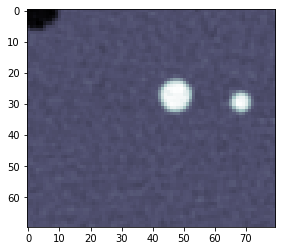

In [ ]:
plt.imshow(data[xs[0]:xs[1], ys[0]:ys[1], 3], cmap="bone")

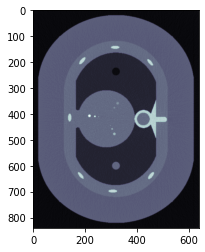

In [ ]:
plt.imshow(data[:, :, 3], cmap="bone")

## Perform Random Motion Augmentation Using TorchIO

In [ ]:
phantom = np.swapaxes(data, 0, 2)
phantom = np.reshape(phantom, (1, phantom.shape[0], phantom.shape[1], phantom.shape[2]))
phantom.shape

(1, 6, 640, 840)

In [ ]:
motion_phantom = random_motion(phantom)
motion_phantom = np.reshape(motion_phantom, (phantom.shape[1], phantom.shape[2], phantom.shape[3]))
motion_phantom = np.swapaxes(motion_phantom, 0, 2)

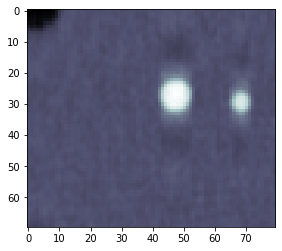

In [ ]:
plt.imshow(motion_phantom[xs[0]:xs[1], ys[0]:ys[1], 3], cmap="bone")

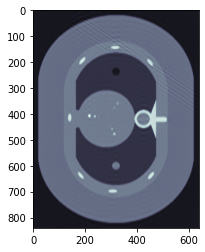

In [ ]:
plt.imshow(motion_phantom[:, :, 3], cmap="bone")

## Save Numpy Array

In [ ]:
# np_path = join(dirname(dcm_path), energies[0] + "-motion")

In [ ]:
# np.save(np_path, motion_phantom)